In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [4]:
sns.set(rc={'figure.figsize':(30,10)})

In [5]:
path = '/media/ke/8tb_part2/FSL_work/SH/SH_022_20170307_edits.txt'

In [6]:
endTidal = pd.read_csv(path, sep='\t|,', header=None, usecols=[0, 1, 2], index_col=False, engine='python')
endTidal = endTidal.rename(columns={0 : 'Time',
                                    1 : 'O2',
                                    2 : 'CO2'})
# need to scale CO2 data is necessary
if endTidal.CO2.max() < 1:
    endTidal.CO2 = endTidal.CO2 * 100

if endTidal.Time.max() < 20:
    endTidal.Time = endTidal.Time * 60
i = 0
diff = abs(endTidal.O2.iloc[i+1] - endTidal.O2.iloc[0])
while diff < 0.75:
    i += 1
    diff = abs(endTidal.O2.iloc[i+1] - endTidal.O2.iloc[0])

endTidal = endTidal[i:].reset_index(drop=True)

i = len(endTidal)-1
diff = abs(endTidal.O2.iloc[len(endTidal)-1] - endTidal.O2.iloc[i])
while diff < 0.75:
    i -= 1
    diff = abs(endTidal.O2.iloc[len(endTidal)-1] - endTidal.O2.iloc[i])

endTidal = endTidal[:i].reset_index(drop=True)

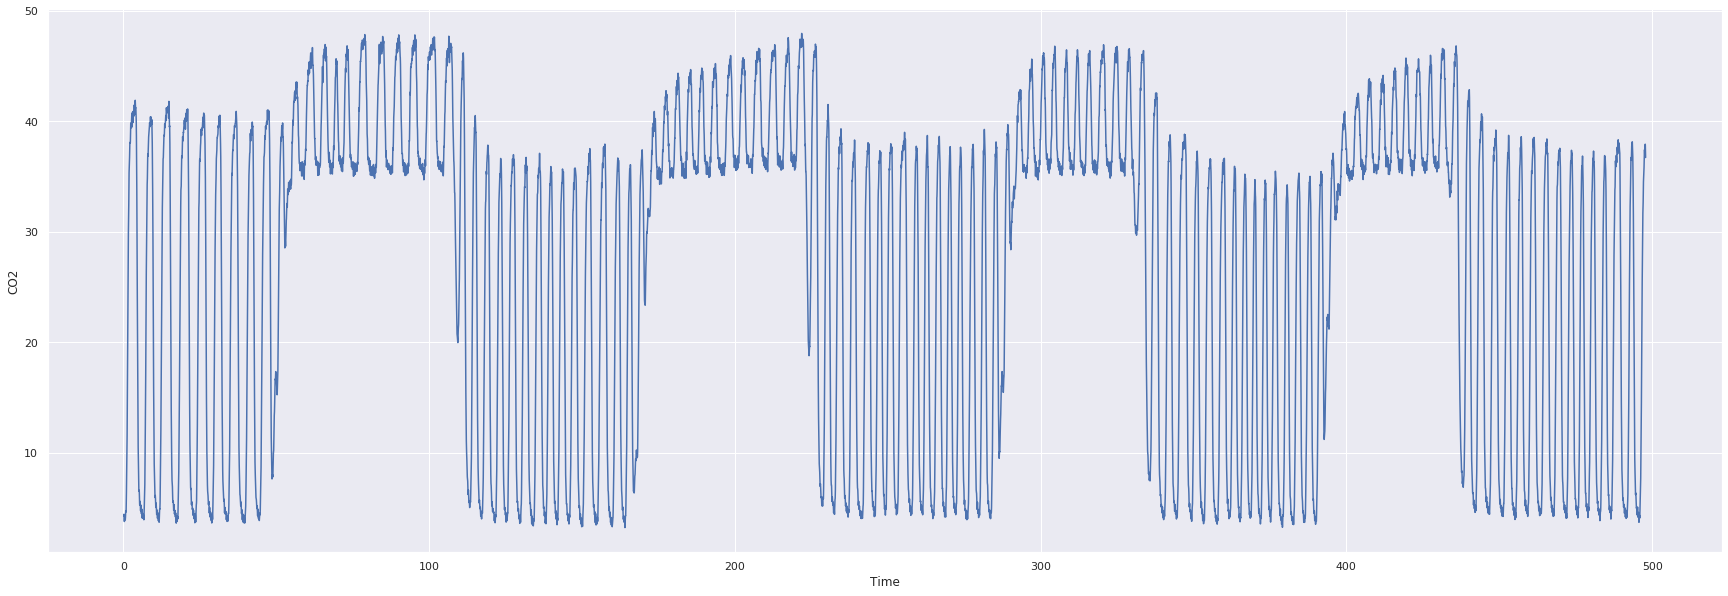

In [7]:
sns.lineplot(x='Time', y='CO2', data=endTidal)
plt.show()

In [8]:
endTidal.CO2 = signal.detrend(endTidal.CO2)
endTidal.O2 = signal.detrend(endTidal.O2)

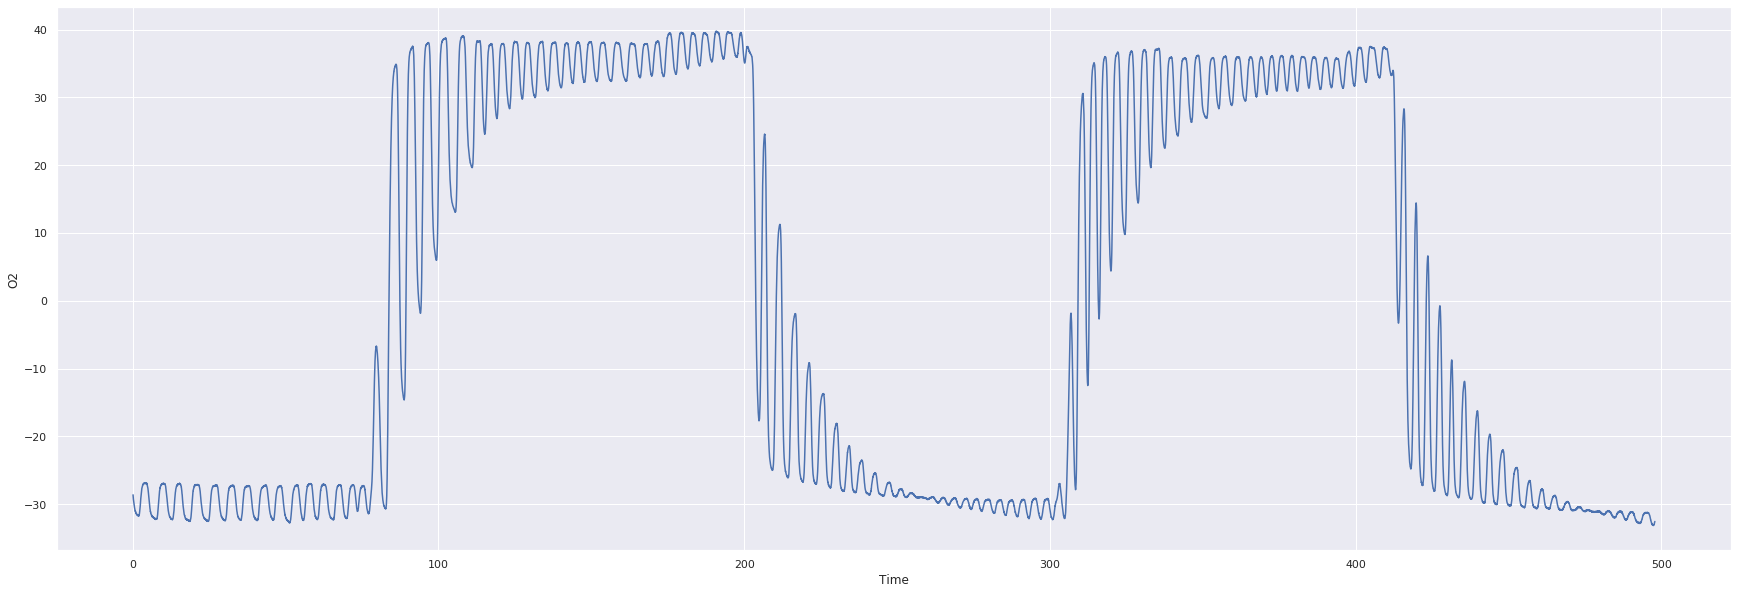

In [9]:
sns.lineplot(x='Time', y='O2', data=endTidal)
plt.show()

In [10]:
from scipy.fftpack import hilbert

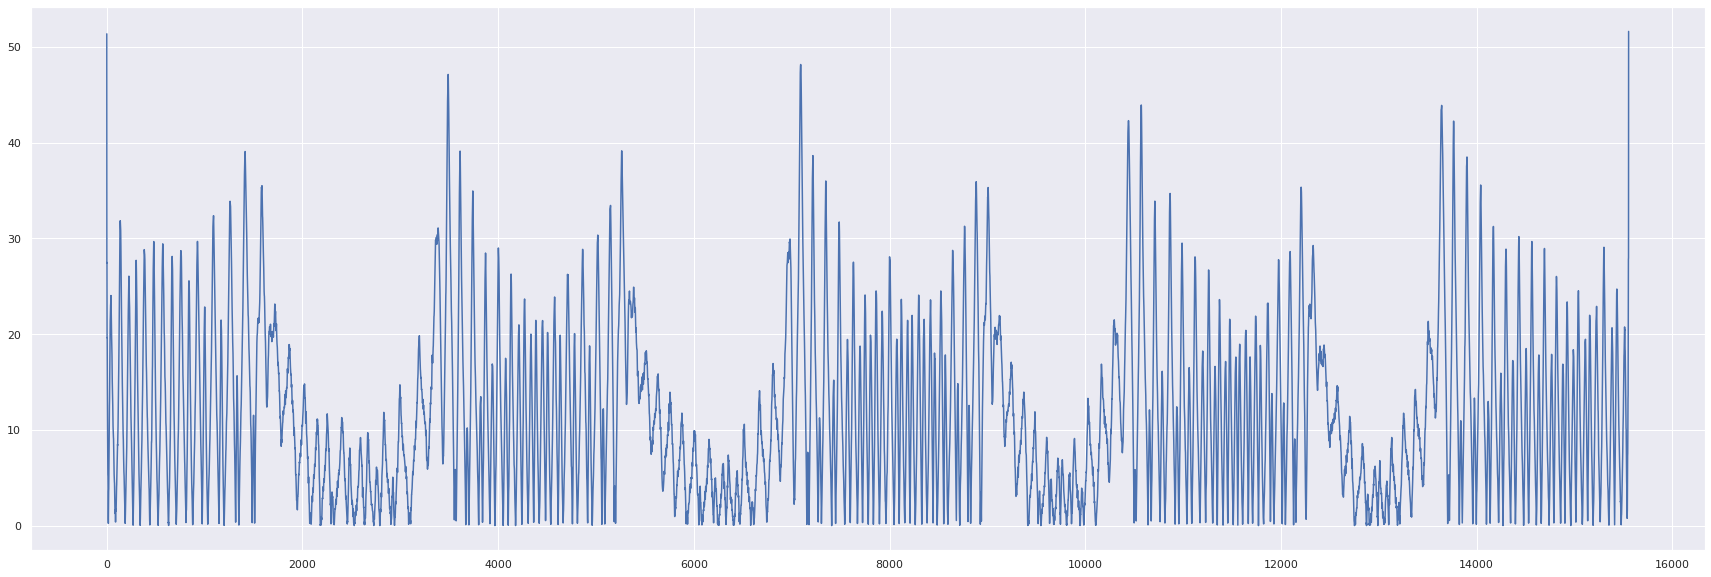

In [13]:
hilb = hilbert(endTidal.CO2)
envelope = (endTidal.CO2 ** 2 + hilb ** 2) ** 0.5
plt.plot(abs(hilb))

In [17]:
meants_path = '/home/ke/Desktop/all_meants/WH1414_20190104_edits.txt'

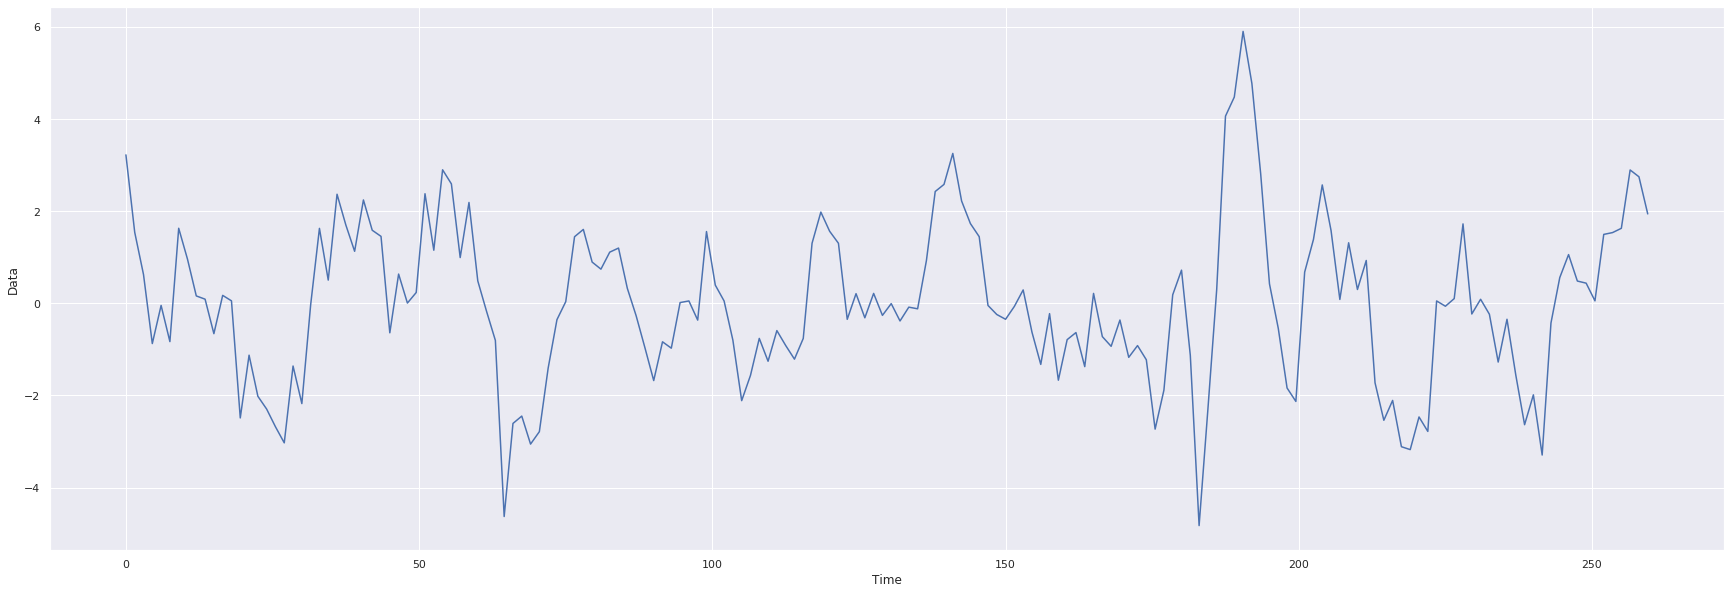

In [18]:
meants_df = pd.read_csv(meants_path, sep='\t|,', header=None, usecols=[0, 1], index_col=False, engine='python')
meants_df = meants_df.rename(columns={0 : 'Time',
                                      1 : 'Data'})
sns.lineplot(x='Time', y='Data', data=meants_df)
plt.show()

In [14]:
print(np.arange(2, 20, 2))

[ 2  4  6  8 10 12 14 16 18]
